# Plot MAOS simulations for Keck GLAO

First, here are some plots from MAOS simulations that Mark ran. These are older simulations, only on-axis.

In [2]:
from astropy.table import Table
import numpy as np
import pylab as plt

In [2]:
t = Table.read('sim_data_2018_06_28.txt', format='ascii')

In [4]:
ope = np.where((t['sim'] == 'MAOS') & (t['dm'] == 'open'))[0]
asm = np.where((t['sim'] == 'MAOS') & (t['dm'] == 'AM2'))[0]

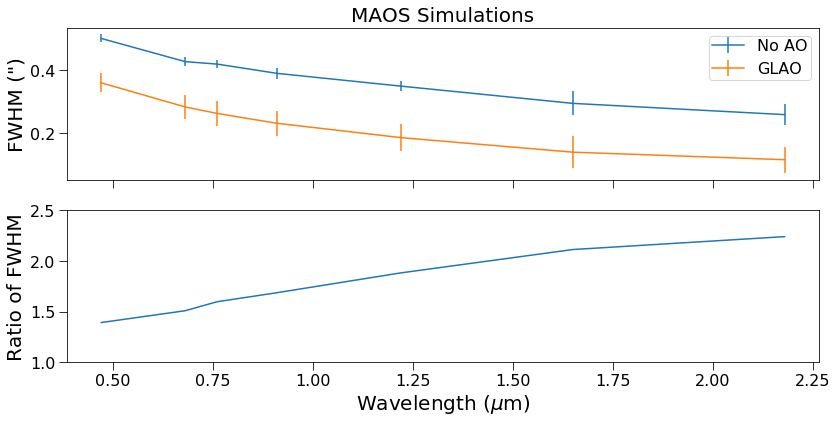

In [32]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.08)

ax1 = plt.subplot(2, 1, 1)
plt.errorbar(t[ope]['wave_um'], t[ope]['fwhm_asec'], yerr=t[ope]['std_asec'], label='No AO')
plt.errorbar(t[asm]['wave_um'], t[asm]['fwhm_asec'], yerr=t[asm]['std_asec'], label='GLAO')
plt.legend()
plt.ylabel('FWHM (")')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title('MAOS Simulations')

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(t[asm]['wave_um'], t[ope]['fwhm_asec'] / t[asm]['fwhm_asec'])
plt.ylabel('Ratio of FWHM')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylim(1, 2.5)

plt.savefig('maos_glao_sims.png')

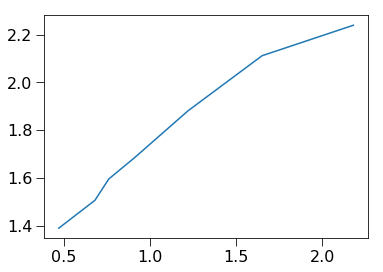

In [15]:
plt.plot(t[asm]['wave_um'], t[ope]['fwhm_asec'] / t[asm]['fwhm_asec'])



## 2018-09-15 Simulated PSFs Over Field

Mark Chun ran the simulations and Steve Robinson compiled the statistics.

In [7]:
t = Table.read('psf_stats.fits')
t.pprint(max_width=-1, max_lines=-1)
print(t.colnames)

                           Image                            x_position[arcsec] y_position[arcsec] wavelength[m] EE50[arcsec] NEA[arcsec^2]  emp_fwhm[arcsec] mof_fwhm_min[arcsec] mof_fwhm_maj[arcsec]
----------------------------------------------------------- ------------------ ------------------ ------------- ------------ -------------- ---------------- -------------------- --------------------
    6LGS.47x47.AM2.20180830001953_psfc_x36_y36_combine.fits      1.91470747471      1.91789554386       4.7e-07  0.326393015  1.00917639296   0.481031984089       0.487837857782       0.489511679771
    6LGS.47x47.AM2.20180830001953_psfc_x36_y36_combine.fits      1.91366178159      1.90754548217       4.7e-07  0.394480215  1.46434101232   0.676077735525       0.676095299632       0.675435216862
    6LGS.47x47.AM2.20180830001953_psfc_x36_y36_combine.fits      1.91381575761       1.9155859076       4.7e-07 0.3232014275 0.989106370489   0.487087013268       0.489221588985       0.495625965282
    6

## 2018-09-15 Simulated PSFs Over Field - Metrics from Mark

This compilation of statistics is directly from Mark's fits. 

In [35]:
_in = open('chun_20180830001953.txt', 'r')

# First line contains wavelength info.
line1 = _in.readline()
waves = np.array( line1.split(':')[1].split(), dtype=float)

# Number of positions:
npos = 37
nwav = len(waves)

# Some arrays to save
xpos = np.zeros(npos, dtype=int)
ypos = np.zeros(npos, dtype=int)
fwhm_emp = np.zeros((npos, nwav), dtype=float)
fwhm = np.zeros((npos, nwav), dtype=float)
beta = np.zeros((npos, nwav), dtype=float)
eed50 = np.zeros((npos, nwav), dtype=float)
nea = np.zeros((npos, nwav), dtype=float)

# Loop through every 8 lines for a different detector position.
for pp in range(npos):
    lines = []
    for ii in range(8):
        lines.append(_in.readline())
    
    # Positions from line 2
    both_pos = lines[1].split(':')[-1].split()
    xpos[pp] = np.float(both_pos[0])
    ypos[pp] = np.float(both_pos[1])
    
    # Empirical FWHM from line 3
    tmp = np.array(lines[2].split(':')[-1].split(), dtype=float)
    fwhm_emp[pp, :] = tmp

    # Moffat FWHM from line 4
    tmp = np.array(lines[3].split(':')[-1].split(), dtype=float)
    fwhm[pp, :] = tmp

    # Empirical FWHM from line 5
    tmp = np.array(lines[4].split(':')[-1].split(), dtype=float)
    beta[pp, :] = tmp

    # Empirical FWHM from line 5
    tmp = np.array(lines[5].split(':')[-1].split(), dtype=float)
    eed50[pp, :] = tmp

    # Empirical FWHM from line 6
    tmp = np.array(lines[6].split(':')[-1].split(), dtype=float)
    nea[pp, :] = tmp
    

rpos = np.hypot(xpos, ypos)

# Sort all of the arrays by radius
rdx = rpos.argsort()
xpos = xpos[rdx]
ypos = ypos[rdx]
rpos = rpos[rdx]
nea = nea[rdx, :]
fwhm_emp = fwhm_emp[rdx, :]
fwhm = fwhm[rdx, :]
beta = beta[rdx, :]
eed50 = eed50[rdx, :]

glao = np.where(rpos > 1)[0]
see = np.where(rpos < 1)[0][0]

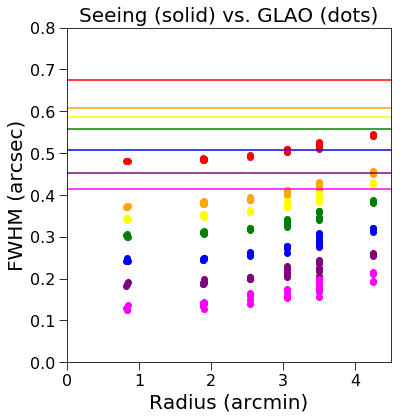

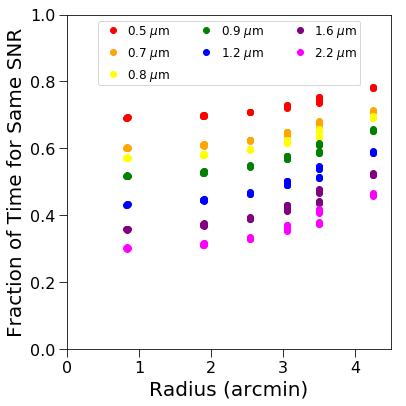

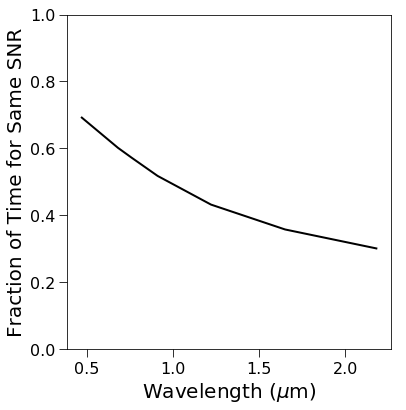

In [104]:
plt.figure(1, figsize=(6, 6))
plt.clf()

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta']

metric = fwhm_emp

for ww in range(len(waves)):
    plt.plot(rpos[glao] / 60, metric[glao, ww], 'k.', 
             markersize=12,
             color=colors[ww])
    plt.axhline(metric[see, ww], linestyle='-', color=colors[ww])
plt.xlabel('Radius (arcmin)')
plt.ylabel('FWHM (arcsec)')
plt.xlim(0, 4.5)
plt.ylim(0, 0.8)
plt.title('Seeing (solid) vs. GLAO (dots)')
plt.savefig('fwhm_comparison_chun.png')


plt.figure(2, figsize=(6, 6))
plt.clf()
for ww in range(len(waves)):
    legend_lab = '{0:.1f} $\mu$m'.format(np.round(waves[ww], 1))
    plt.plot(rpos[glao] / 60, nea[glao, ww] / nea[see, ww], 'k.', 
             markersize=12,
             color=colors[ww],
             label=legend_lab)
plt.xlabel('Radius (arcmin)')
plt.ylabel('Fraction of Time for Same SNR')
plt.xlim(0, 4.5)
plt.ylim(0, 1)
plt.legend(loc='upper center', ncol=3, handletextpad=0.2, fontsize=12)
plt.savefig('tint_reduce_v_rad_chun.png')

plt.figure(3, figsize=(6, 6))
plt.clf()
plt.plot(waves, nea[1, :] / nea[0, :], 'k-', linewidth=2)
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Fraction of Time for Same SNR')
plt.ylim(0, 1)
plt.savefig('tint_reduce_v_wave_chun.png')

(-198.04801342341389,
 198.04801342341389,
 -198.04646460330375,
 198.04646460330378)

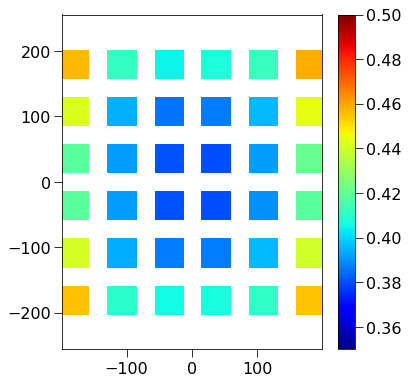

In [100]:
plt.figure(4, figsize=(6, 6))
plt.clf()
plt.scatter(xpos[1:], ypos[1:], c=fwhm[1:, 1], 
            s=800, marker='s', vmin=0.35, vmax=0.5)
plt.colorbar()
plt.axis('equal')

In [103]:
# Try to make the FWHM into an image array. Interpolate along the way
from scipy.interpolate import griddata
xi, yi = np.meshgrid(xi)

[[ 0.381  0.38   0.381  0.38   0.386  0.387]
 [ 0.392  0.39   0.387  0.387  0.392  0.392]
 [ 0.394  0.395  0.396  0.396  0.419  0.419]
 [ 0.406  0.405  0.408  0.407  0.419  0.421]
 [ 0.44   0.41   0.412  0.411  0.413  0.441]
 [ 0.444  0.442  0.459  0.457  0.456  0.455]]
